# 1. Import of libraries

In [14]:
import numpy as np
import urllib.parse
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns 
from google.colab import drive
from  matplotlib.colors import LinearSegmentedColormap
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


#2. Import data

In [4]:
data=pd.read_csv('/content/drive/MyDrive/projet_2023/Dataset_complete.csv')
data=data.sort_values(by=['target', 'seqnum'])
data.head()


,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,0.0,30.98,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA..."
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,0.0,30.98,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/..."
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,0.0,30.98,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/..."
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,0.0,30.98,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA..."
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,0.0,30.98,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A..."


In [23]:
data_nett=data.drop(['loc_initiator_z','ranging_unit','protocol','initiator','target', 'nlos_indicator','ranging_error', 'loc_target_z', 'register_dump_CIR'], axis=1)#Data set with quantitative variables with several values
data_nett=data_nett.replace ("infs", -120) #Replacement of infinite values by -120
for i in data_nett.columns :
  data_nett[i].replace([-np.inf], data_nett[i].median(), inplace=True)

#3. Graphics

##3.1 Histogram 

<ipython-input-13-c4059fcc07d5>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


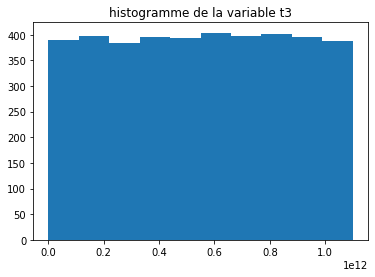

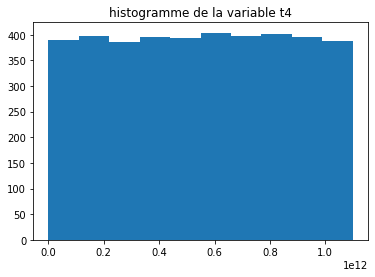

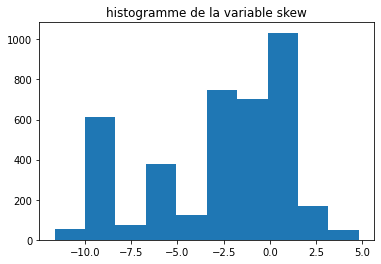

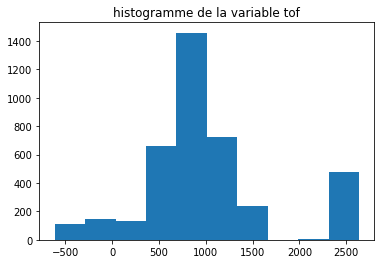

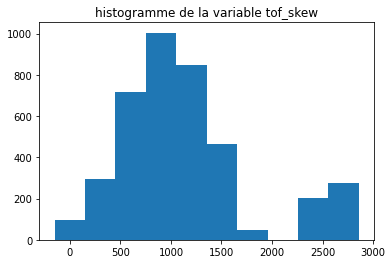

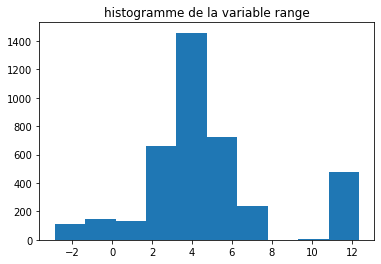

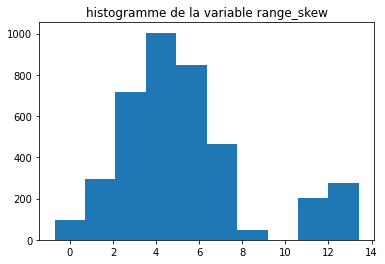

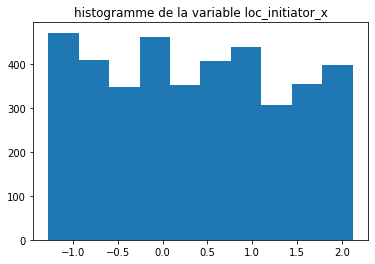

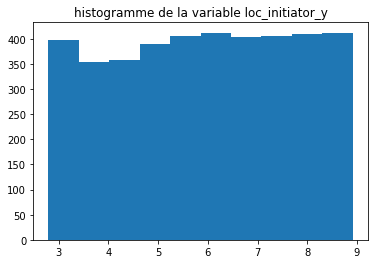

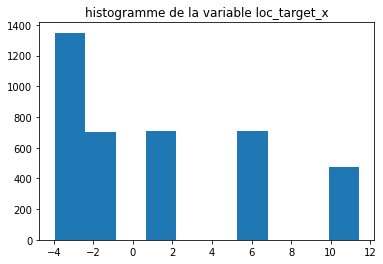

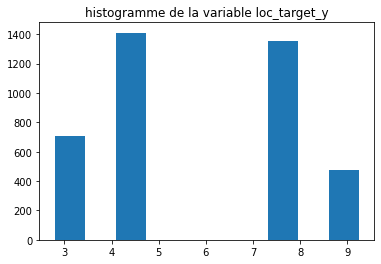

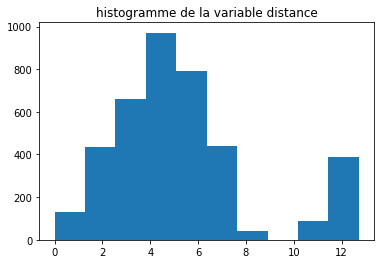

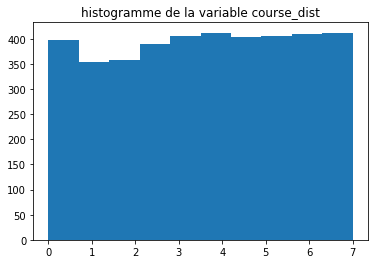

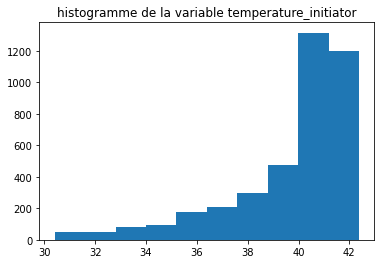

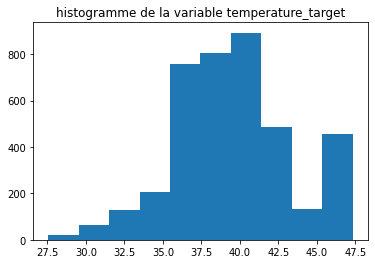

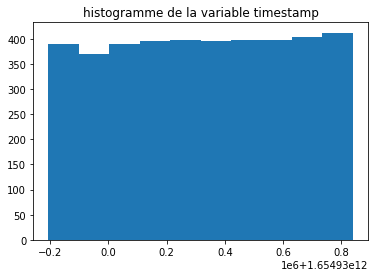

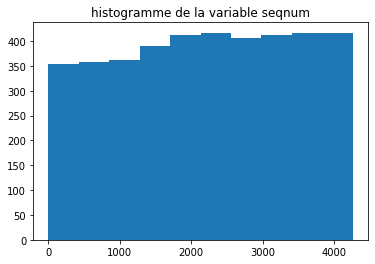

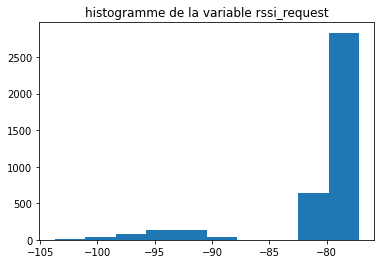

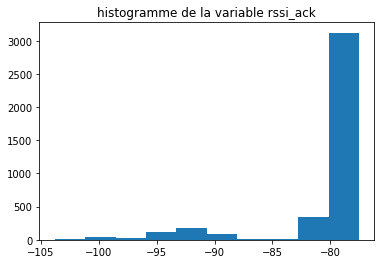

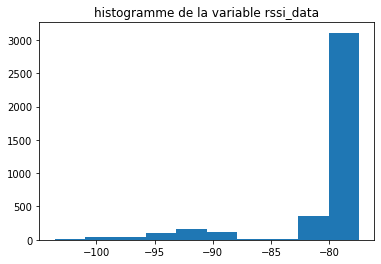

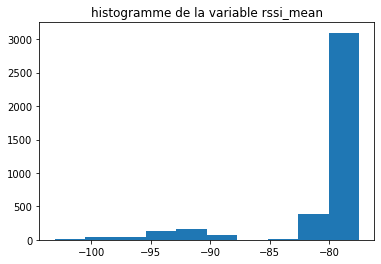

In [13]:
k=1
colonnes=data_nett.columns.tolist()
for variable in colonnes[2:]:
  np.isfinite(data_nett[variable])
  plt.figure(k)
  plt.hist(data_nett[variable])
  titre="histogramme de la variable " + variable
  plt.title(titre)
  k=k+1

# 3.2 Scatter plot

In [16]:
k=3
i=0
colonnes=data_nett.columns.tolist()
colonnes=colonnes[3:]
for variable_a in colonnes:
  k=k+1
  colonnes_b=colonnes[k:]
  for variable_b in colonnes_b : 
    plt.figure(i)
    plt.scatter(x=data_nett[variable_a], y=data_nett[variable_b])
    #sns.regplot(x=data[variable_a], y=data[variable_b], fit_reg=False)
    titre="histogramme de la variable " + variable_a + "et de la variable " + variable_b
    plt.title(titre)
    i=i+1

Output hidden; open in https://colab.research.google.com to view.

# 3.3 Correlation

In [24]:
k=1
colonnes=data_nett.columns.tolist()
for i in colonnes:
  for j in colonnes[1:]:
    #print(i,j)
    coeff_pearson,_ = pearsonr(data_nett[i],data_nett[j])
    print("The Pearson correlation coefficient between ", i ,"et", j, "is", coeff_pearson)

The Pearson correlation coefficient between  t1 et t2 is 0.9999999025186759
The Pearson correlation coefficient between  t1 et t3 is 0.9999999029292693
The Pearson correlation coefficient between  t1 et t4 is 0.9999999999968898
The Pearson correlation coefficient between  t1 et skew is -0.0023852663202131854
The Pearson correlation coefficient between  t1 et tof is -0.002409092160667106
The Pearson correlation coefficient between  t1 et tof_skew is -0.0017787424932710074
The Pearson correlation coefficient between  t1 et range is -0.0024090897391525496
The Pearson correlation coefficient between  t1 et range_skew is -0.0017787451920924422
The Pearson correlation coefficient between  t1 et loc_initiator_x is 0.00836358685254086
The Pearson correlation coefficient between  t1 et loc_initiator_y is -0.008377847618820254
The Pearson correlation coefficient between  t1 et loc_target_x is -0.0015123366934127382
The Pearson correlation coefficient between  t1 et loc_target_y is -0.00063836408

In [18]:
matrix = data_nett.corr()
 
# print correlation matrix
print("Correlation Matrix is : ")
corr=pd.DataFrame(matrix)
corr

Correlation Matrix is : 


,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,loc_initiator_x,...,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
t1,1.000000,1.000000,1.000000,1.000000,-0.002385,-0.002409,-0.001779,-0.002409,-0.001779,0.008364,...,-0.001652,-0.008374,-0.006168,-0.009623,-0.008169,-0.008179,0.005749,0.002930,0.002643,0.003510
t2,1.000000,1.000000,1.000000,1.000000,-0.002454,-0.002196,-0.001536,-0.002196,-0.001536,0.008184,...,-0.001415,-0.008195,-0.006019,-0.009639,-0.007989,-0.008000,0.005662,0.002849,0.002562,0.003425
t3,1.000000,1.000000,1.000000,1.000000,-0.002453,-0.002196,-0.001536,-0.002196,-0.001536,0.008184,...,-0.001415,-0.008195,-0.006019,-0.009639,-0.007989,-0.008000,0.005662,0.002849,0.002561,0.003424
t4,1.000000,1.000000,1.000000,1.000000,-0.002384,-0.002409,-0.001779,-0.002409,-0.001779,0.008364,...,-0.001652,-0.008374,-0.006168,-0.009624,-0.008168,-0.008179,0.005749,0.002930,0.002643,0.003510
skew,-0.002385,-0.002454,-0.002453,-0.002384,1.000000,0.285031,-0.003157,0.285031,-0.003157,0.112759,...,-0.004587,-0.112758,-0.116582,-0.644079,-0.110958,-0.111462,-0.022839,-0.025602,-0.026010,-0.025359
tof,-0.002409,-0.002196,-0.002196,-0.002409,0.285031,1.000000,0.957612,1.000000,0.957612,-0.173779,...,0.954879,0.173776,0.129241,-0.025669,0.174509,0.173775,-0.795888,-0.794708,-0.800369,-0.796245
tof_skew,-0.001779,-0.001536,-0.001536,-0.001779,-0.003157,0.957612,1.000000,0.957612,1.000000,-0.215134,...,0.997571,0.215130,0.169785,0.166641,0.215356,0.214740,-0.823684,-0.821499,-0.827246,-0.823296
range,-0.002409,-0.002196,-0.002196,-0.002409,0.285031,1.000000,0.957612,1.000000,0.957612,-0.173779,...,0.954879,0.173776,0.129241,-0.025669,0.174509,0.173775,-0.795888,-0.794708,-0.800369,-0.796245
range_skew,-0.001779,-0.001536,-0.001536,-0.001779,-0.003157,0.957612,1.000000,0.957612,1.000000,-0.215134,...,0.997571,0.215130,0.169785,0.166641,0.215356,0.214740,-0.823684,-0.821499,-0.827246,-0.823296
loc_initiator_x,0.008364,0.008184,0.008184,0.008364,0.112759,-0.173779,-0.215134,-0.173779,-0.215134,1.000000,...,-0.213308,-1.000000,-0.862861,-0.486739,-0.999776,-0.999899,0.148705,0.127125,0.123521,0.143584


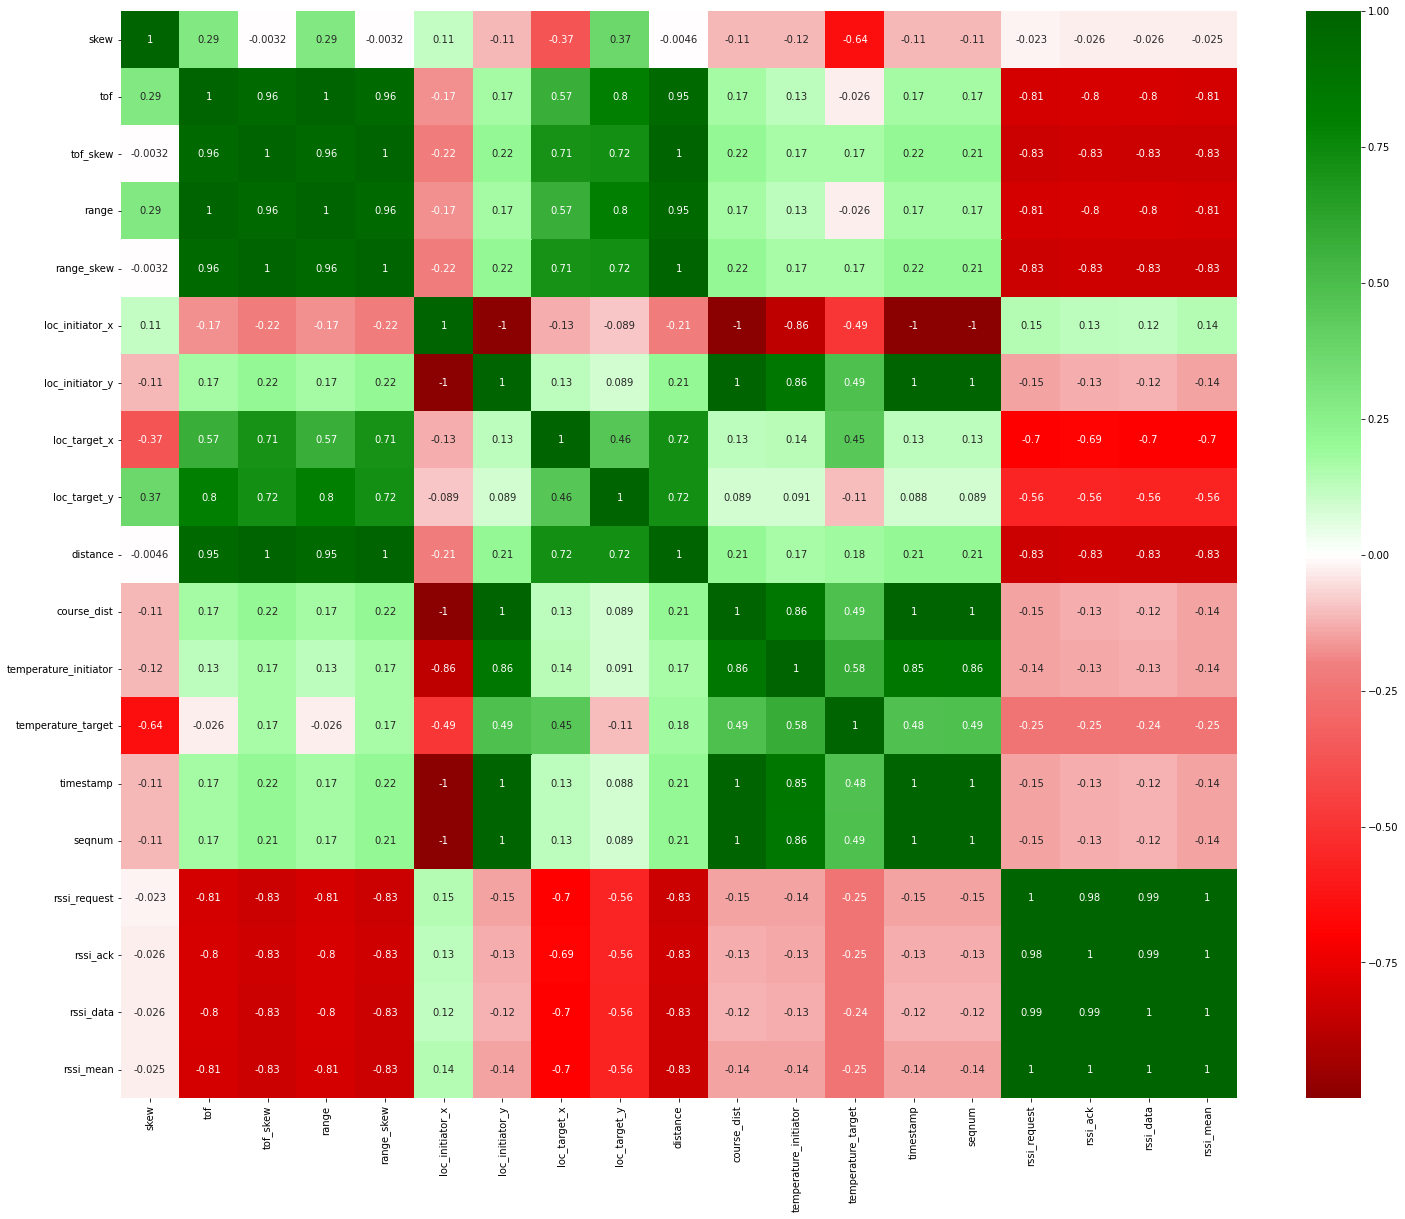

In [19]:
data_nett=data.drop(['loc_initiator_z','ranging_unit','protocol','initiator','target', 'nlos_indicator','ranging_error', 'loc_target_z', 't1', 't2', 't3', 't4'], axis=1)
matrix = data_nett.corr()
corr=pd.DataFrame(matrix)
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
GnRd=LinearSegmentedColormap.from_list('rg',l, N=256)
plt.figure(1,figsize = (25, 20))
ax = sns.heatmap(data_nett.corr(), annot=True,cmap=GnRd)

1. The rssi are strongly positively correlated with each other. This can be explained by the fact that rssi_mean is the linear combination of the other

2. loc_target_x, loc_target_y and distance are strongly negatively correlated with rssi

3. skew, tof, tof_skew, range et range_skew are strongly negatively correlated with rssi

4. skew, tof, tof_skew, range et range_skew are strongly positively correlated with loc_target_x, loc_target_y and distance

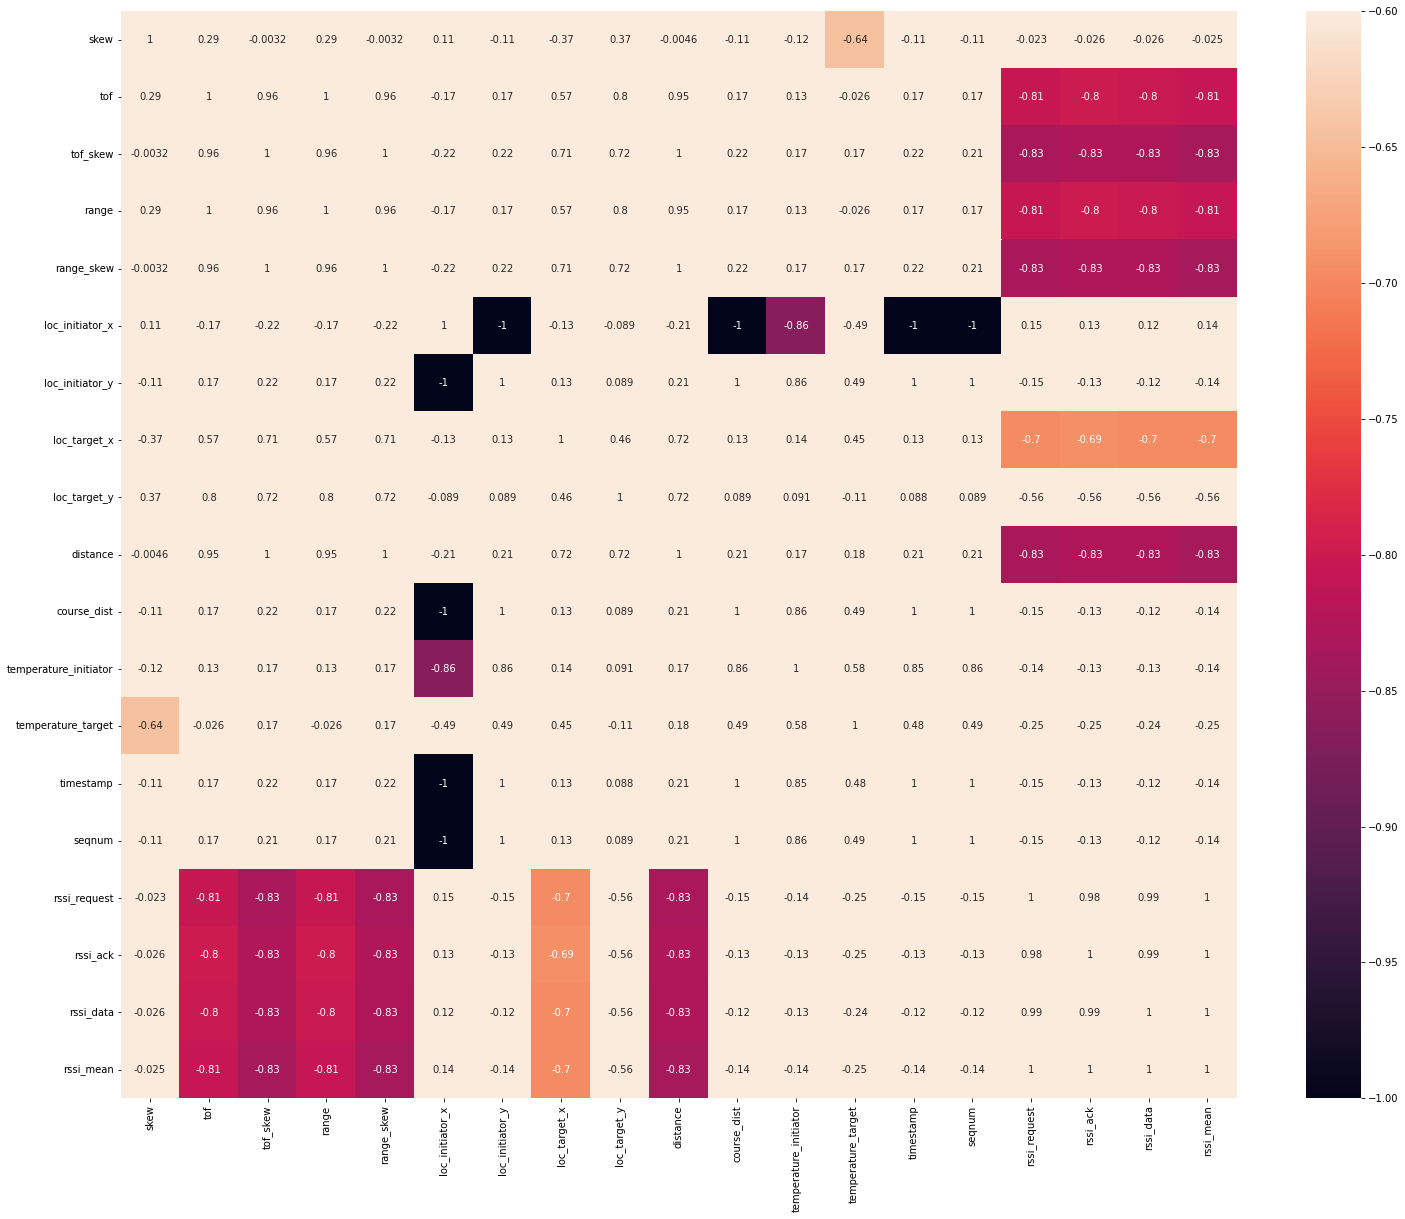

In [20]:
plt.figure(1,figsize = (25, 20))
ax = sns.heatmap(data_nett.corr(), vmin=-1, vmax=-0.6, annot=True) #Correlation matrix with correlation less than -0.6

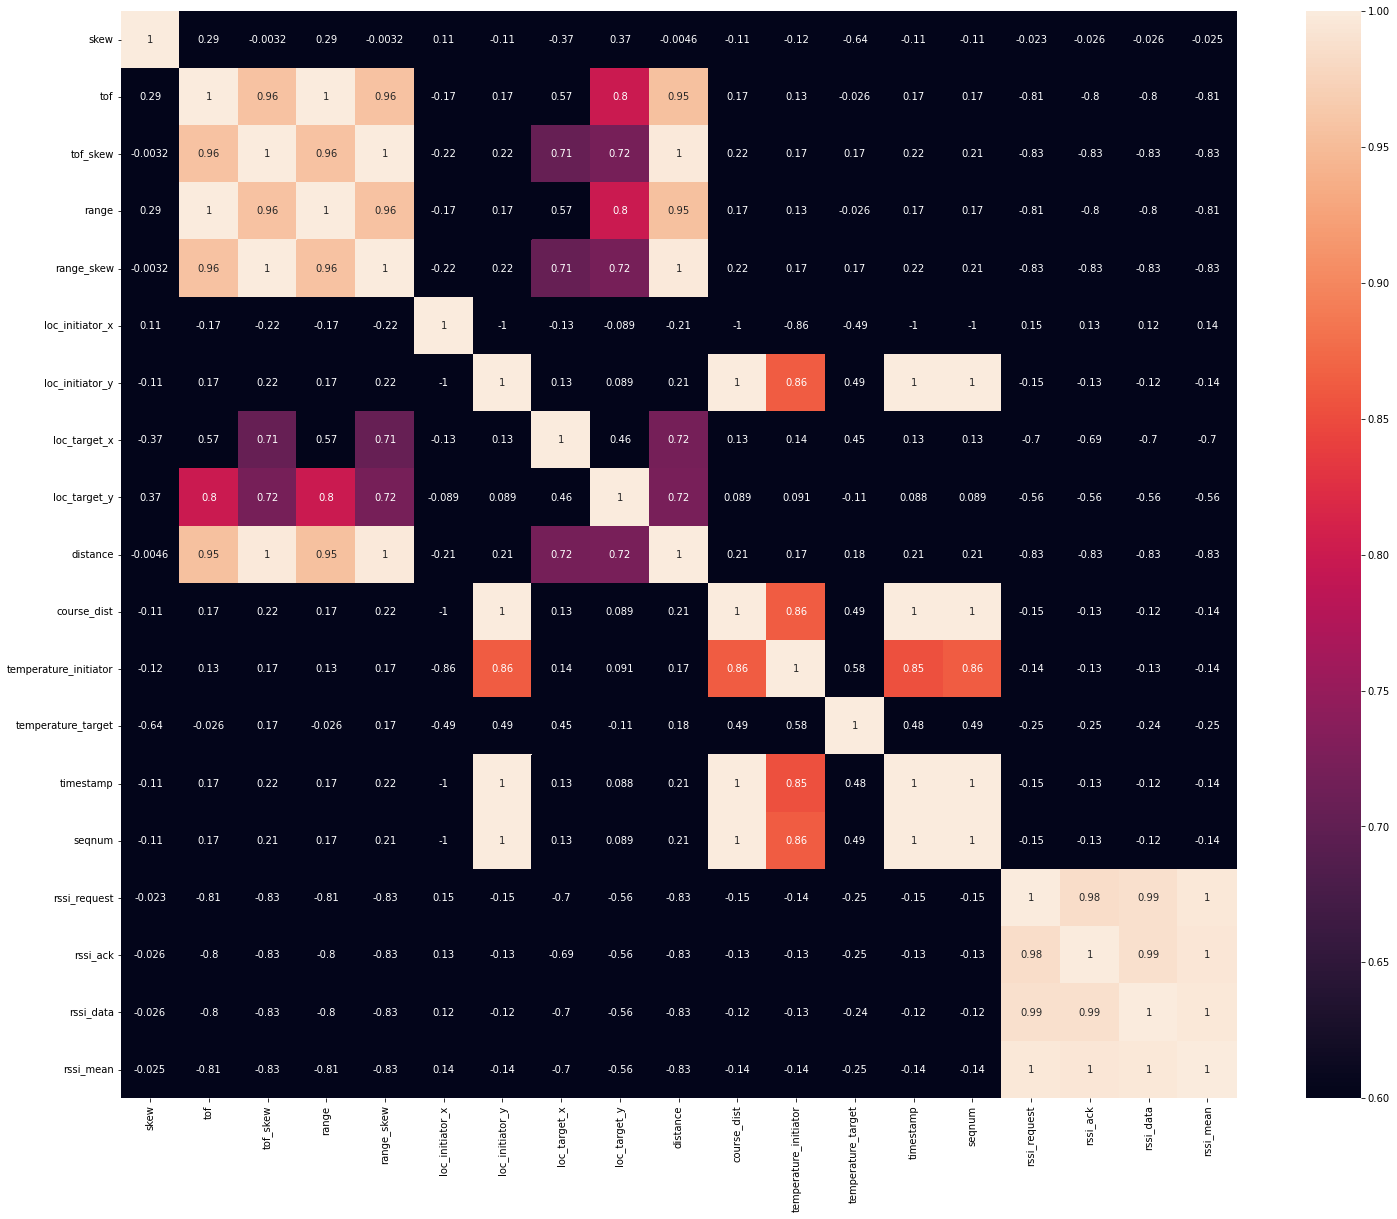

In [21]:
plt.figure(1,figsize = (25, 20))
ax = sns.heatmap(data_nett.corr(), vmin=0.6, vmax=1, annot=True) #Correlation matrix with correlation less than 0.6